# Bivariate Time Series Manipulation & Visualization

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Accumulated Generation</th>
            <th>Output: Technology Relationship</th>
            <th>Input: Hourly Energy Generation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/02_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/02_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/02_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>


## Data

,Solar Photovoltaic,Eolic
time,,
2022-09-01 00:00:00,1.0,4387.050
2022-09-01 01:00:00,1.0,4008.900
...,...,...
2023-08-31 22:00:00,17.6,3057.950
2023-08-31 23:00:00,17.4,3028.675


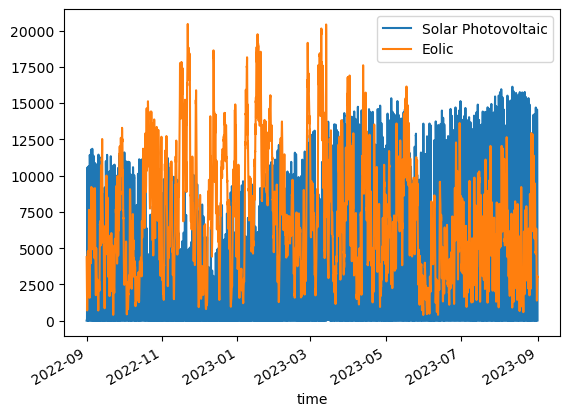

In [18]:
df_renewable.plot(); #!

## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Daily

<AxesSubplot: xlabel='time'>

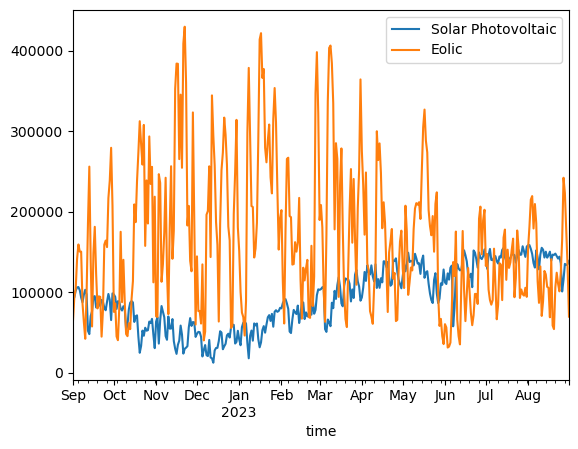

In [19]:
df_renewable.resample(rule='D').sum().plot.line() #!

### Monthly

<AxesSubplot: xlabel='time'>

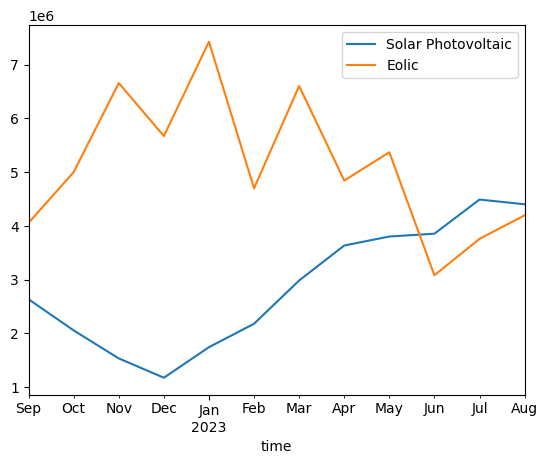

In [20]:
df_renewable.resample(rule='M').sum().plot.line() #!

<AxesSubplot: xlabel='time'>

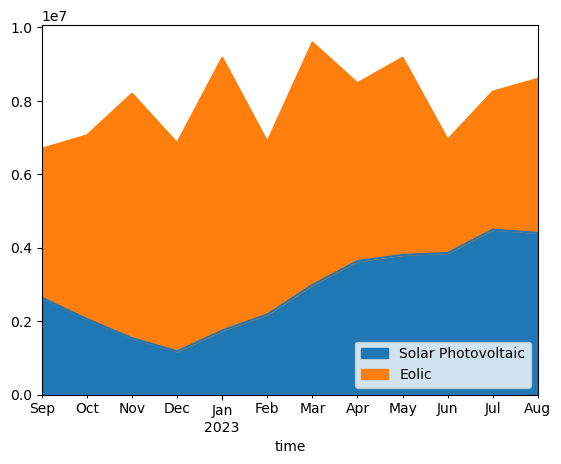

In [21]:
df_renewable.resample(rule='M').sum().plot.area() #!

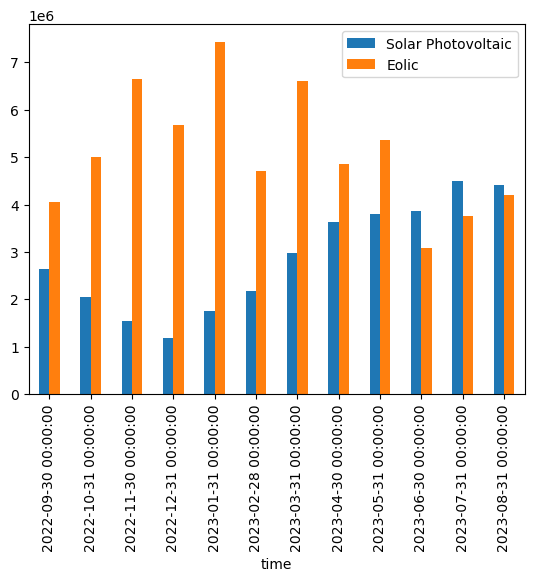

In [22]:
df_renewable.resample(rule='M').sum().plot.bar(); #!

## Visualize Time Series Correlation

,Solar Photovoltaic,Eolic
time,,
2022-09-01,695863.476,864037.706
2022-09-08,555033.259,871012.693
...,...,...
2023-08-24,900329.814,1164917.767
2023-08-31,138880.021,69646.772


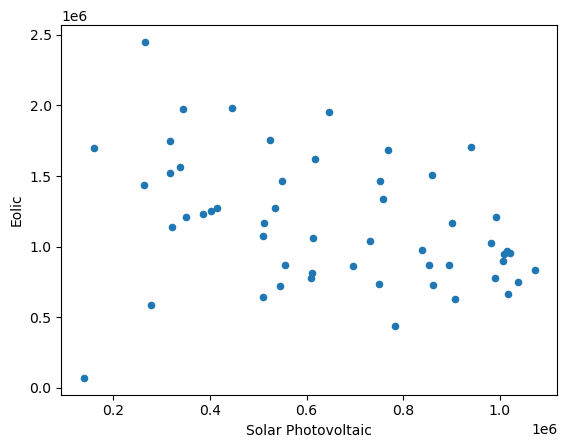

## Data Visualization with Plotly

- [Plotly Express Overview](https://plotly.com/python/plotly-express/#overview)

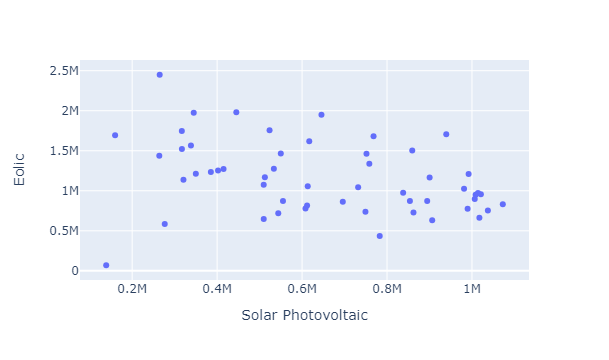

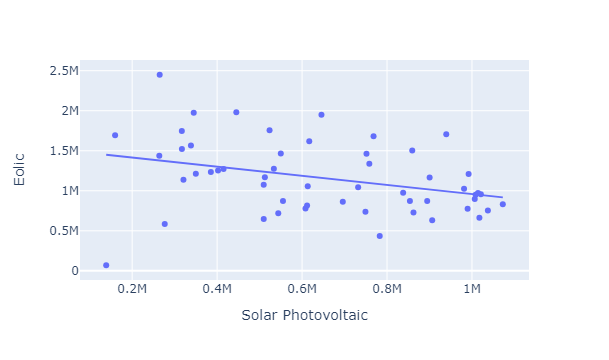

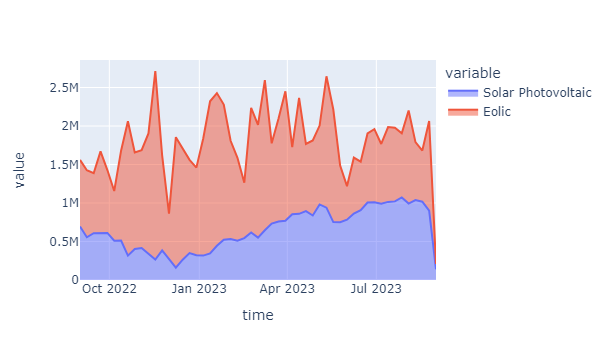

## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

,Solar Photovoltaic,Eolic
time,,
2022-09-01 00:00:00,1.0,4387.050
2022-09-01 01:00:00,1.0,4008.900
...,...,...
2023-08-31 22:00:00,17.6,3057.950
2023-08-31 23:00:00,17.4,3028.675


### Time series categories in one column

,technology,generation
time,,
2022-09-01 00:00:00,Solar Photovoltaic,1.000
2022-09-01 01:00:00,Solar Photovoltaic,1.000
...,...,...
2023-08-31 22:00:00,Eolic,3057.950
2023-08-31 23:00:00,Eolic,3028.675


### Create columns with datetime information

,technology,generation,year,month,day,hour
time,,,,,,
2022-09-01 00:00:00,Solar Photovoltaic,1.000,2022,9,1,0
2022-09-01 01:00:00,Solar Photovoltaic,1.000,2022,9,1,1
...,...,...,...,...,...,...
2023-08-31 22:00:00,Eolic,3057.950,2023,8,31,22
2023-08-31 23:00:00,Eolic,3028.675,2023,8,31,23


### Process `pivot_table`

- Use this methodology.

year                       2022                                         \
month                        9            10           11           12   
technology                                                               
Eolic               4058314.734  5002114.206  6657801.544  5671385.864   
Solar Photovoltaic  2636219.180  2056758.270  1535995.490  1176871.031   

year                       2023                                         \
month                        1            2            3            4    
technology                                                               
Eolic               7426712.678  4700334.703  6603070.491  4844750.027   
Solar Photovoltaic  1744956.450  2181165.122  2985426.080  3635891.249   

year                                                                    
month                        5            6            7            8   
technology                                                              
Eolic               5370790.331  3083011.561  3759950.872  4197239.743  
Solar Photovoltaic  3803151.814  3855930.011  4491017.672  4403223.582

### Style DataFrame